# Fit FermiEdge and Correct the Energy Sacle

### Modules needed for load XY files and ploting the data

In [1]:
# --- matplotlib --------------------------------------------------------------
import matplotlib.pyplot as plt

# --- Our own modules ---------------------------------------------------------
import sys

# permatent location of functions from pyFitXPS
sys.path.insert(0, '/home/julio/Python/pyFitXPS/pyfitxps/') # Julio Laptop
#sys.path.insert(0, '/Users/ceciliapatrault/Desktop/Julio/XPS_PYTHON/paquetes_funciones') # Mac
import specs_xy as sp
import fitxps as fx

search and listing the files in folder located realive to this notebook

In [2]:
files_path = "data/separated/"

# the module specs_xy as ps have the function "list_files_xy()"
files = sp.list_files_xy(files_path)

print(files)

data/separated/
['data/separated/Au_MeMBA_5min_10_Survey (0).xy', 'data/separated/Au_MeMBA_5min_11_S (0).xy', 'data/separated/Au_MeMBA_5min_12_C (0).xy', 'data/separated/Au_MeMBA_5min_13_Au (0).xy', 'data/separated/Au_MeMBA_5min_14_VB (0).xy', 'data/separated/Au_MeMBA_5min_15_O (0).xy', 'data/separated/Au_MeMBA_5min_16_S (1).xy', 'data/separated/Au_MeMBA_5min_17_C (1).xy', 'data/separated/Au_MeMBA_5min_18_Au (1).xy', 'data/separated/Au_MeMBA_5min_19_VB (1).xy', 'data/separated/Au_MeMBA_5min_20_O (1).xy', 'data/separated/Au_MeMBA_5min_21_S (2).xy', 'data/separated/Au_MeMBA_5min_22_C (2).xy', 'data/separated/Au_MeMBA_5min_23_Au (2).xy', 'data/separated/Au_MeMBA_5min_24_VB (2).xy', 'data/separated/Au_MeMBA_5min_25_O (2).xy', 'data/separated/Au_MeMBA_5min_26_S (3).xy', 'data/separated/Au_MeMBA_5min_27_C (3).xy', 'data/separated/Au_MeMBA_5min_28_Au (3).xy', 'data/separated/Au_MeMBA_5min_29_VB (3).xy', 'data/separated/Au_MeMBA_5min_30_O (3).xy', 'data/separated/Au_MeMBA_5min_31_Spectrum.xy']

In [3]:
survey = sp.load_one_file_xy('data/separated/Au_MeMBA_5min_10_Survey (0).xy')
VB_0 = sp.load_one_file_xy('data/separated/Au_MeMBA_5min_14_VB (0).xy')
Au_0 = sp.load_one_file_xy('data/separated/Au_MeMBA_5min_13_Au (0).xy')
S_0 = sp.load_one_file_xy('data/separated/Au_MeMBA_5min_11_S (0).xy')

To fit the FermiEdge first is good to plot the Valence Band region.

Text(0, 0.5, 'Intensity [cps]')

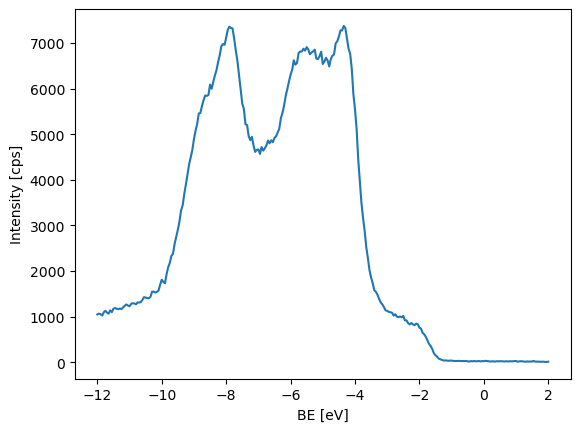

In [4]:
plt.plot(VB_0['data_orig']['BE'],VB_0['data_orig']['intensity'])
plt.xlabel('BE [eV]')
plt.ylabel('Intensity [cps]')

## Fitting Fermi Edge
The function `FermiEdge` fit the data of Valence Band in a range close to Fermi edge, store the results as `lmfit.results` object in the same region's dictionary, plot and print the results

In [10]:
fx.FermiEdge??


Signature: fx.FermiEdge(region, energy_scale, xmin, xmax, A, c, b, m, T, gw, center)
Source:   
def FermiEdge(region, energy_scale, xmin, xmax, A, c, b, m, T, gw, center):
    """
    Return the fit of FermiEdge times linear DOS convoluted with a
    gaussian function

    Parameters
    ----------
    region : variable - dict name
        name of dictionary to containg the VB region to be fitted
    energy_scale : string
        which energy scale be selected: 'BE' or 'KE'
    xmin : float
        min for range data to fit
    xmax : float
        max for range data to fit
    c : float
        background noise right to the FermiEdge
    A : float
        pre-exponentian factor
    b : float
        linear intercept left to the FermiEdge for the linear DOS
    m : float
        slope for linear DOS
    T : float
        temperature in Kelvin
    gw : float
        gaussian with
    center : float
        position of the FermiEdge

    Returns
    -------
    lmfit fit_report and plot 

[[Model]]
    (Model(FL_LDOS, prefix='FL_') <function convolve at 0x7f929968f250> Model(gauss_nor_area, prefix='g_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 87
    # data points      = 42
    # variables        = 6
    chi-square         = 18964.2366
    reduced chi-square = 526.784351
    Akaike info crit   = 268.730905
    Bayesian info crit = 279.156922
[[Variables]]
    FL_m:      -14.0202933 +/- 4545249.96 (32419078.88%) (init = -1)
    FL_b:       22.5178253 +/- 7300069.90 (32419071.55%) (init = 20)
    FL_c:       1.68090221 +/- 0.33033500 (19.65%) (init = 0)
    FL_A:       1.36199568 +/- 441546.389 (32419074.03%) (init = 1)
    FL_center: -1.70835390 +/- 0.00680715 (0.40%) (init = -1.5)
    FL_T:       300 (fixed)
    g_center:  -1.70835390 +/- 0.00680715 (0.40%) == 'FL_center'
    g_gw:       0.43079398 +/- 0.03407933 (7.91%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(FL_b, FL_A)      = -1.000
    C(FL_m, FL

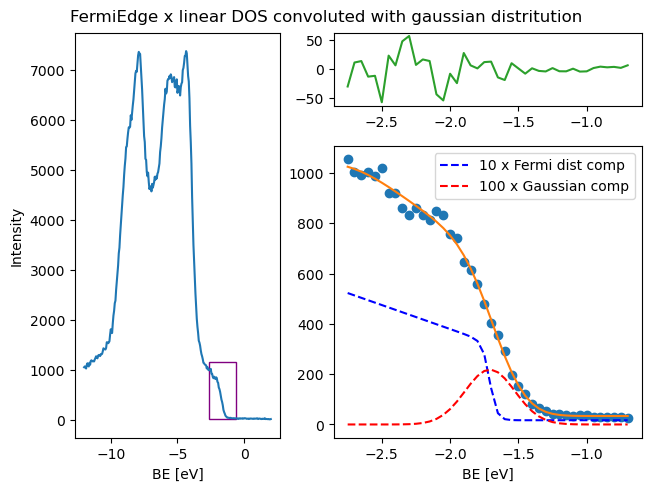

In [ ]:
# fx.FermiEdge(region, energy_scale, xmin, xmax, c, b, m, T, gw, center)

fx.FermiEdge(VB_0,'BE',-2.8,-0.7,1,0,20,-1,300,0.5,-1.5)

to extract the FL value is only needed the `lmfit` method `best_values`.

In [ ]:
VB_0.keys()

dict_keys(['details', 'data_orig', 'results'])

In [ ]:
FL = VB_0['results'].best_values['FL_center']

print("The Fermi Level is actually at {:.3f} eV".format(FL))

The Fermi Level is actually at -1.708 eV


## Correct the Energy Scale 
There are two functions to correct the energy scale. The function `Energy_Corr_one(region, shift)` apply the scale shift *manually*, and the function `Energy_Corr_one_FL(region, ref_region)` apply the scale shift as reference to the fitted Valence Bande `ref_rerion`. Both functions store the corrected energy scale in `region['data_corr']` and finally plot the original data and the new corrected data.

-1.7083539023894105


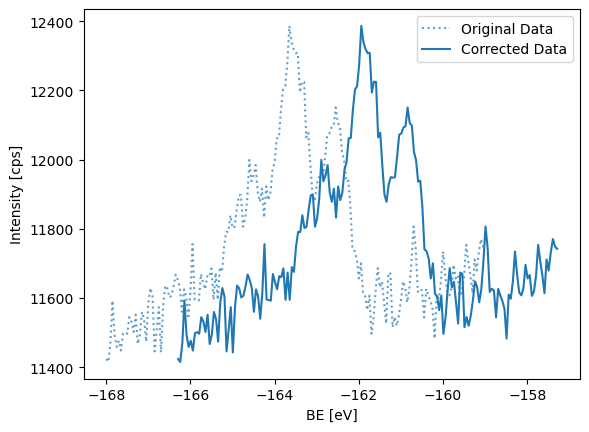

In [ ]:
# fx.Energy_Corr_one(region, shift)
# here the "shift" value must be introduced manully as `float`
# fx.Energy_Corr_one(S_0, shift)

# fx.Energy_Corr_one_FL(region,ref,region)
# here is necesari declare the `region`to be corrected, and the `ref_region` for example 
# the last VB region fitted at FL
fx.Energy_Corr_one_FL(S_0,VB_0)

-1.7083539023894105


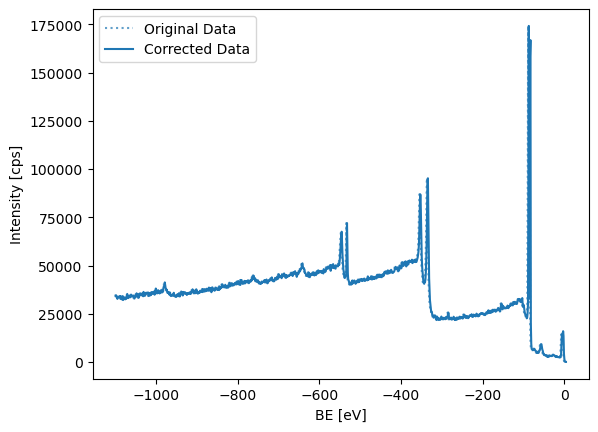

In [ ]:
fx.Energy_Corr_one_FL(survey,VB_0)

-1.7083539023894105


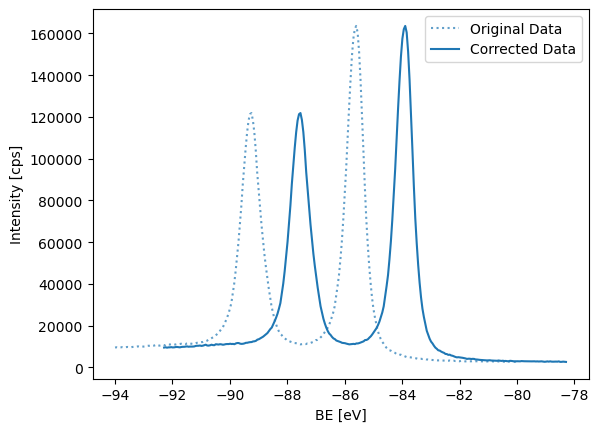

In [ ]:
fx.Energy_Corr_one_FL(Au_0,VB_0)

In [ ]:
Au_0.keys()

dict_keys(['details', 'data_orig', 'data_corr'])

# Correct energy scale for several regions at once
The are another function `Energy_Corr_list_FL` which shift the energy scale in the same way that the previous functions, but it act recursivaly to every region ina a list:

In [ ]:
# Here we deleted the previous correction to shows how the functions works.
list_to_clean_corr = [survey,S_0,Au_0]

for region in list_to_clean_corr:
    del region['data_corr']
    print(region.keys())

# the key `data_corr` was deleted on each dictionary

dict_keys(['details', 'data_orig'])
dict_keys(['details', 'data_orig'])
dict_keys(['details', 'data_orig'])


In [ ]:
Au_0.keys()

dict_keys(['details', 'data_orig'])

In [ ]:
list_to_corect = [S_0,Au_0,survey]

fx.Energy_Corr_list_FL(list_to_corect,VB_0)

-1.7083539023894105


In [ ]:
# to check that a new `data_corr` is created.
Au_0.keys()

dict_keys(['details', 'data_orig', 'data_corr'])

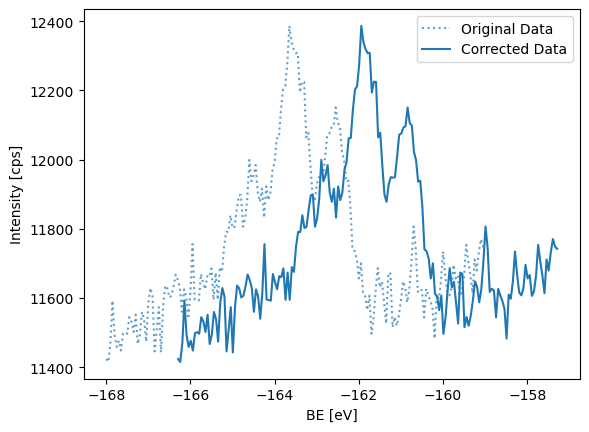

In [ ]:
fx.plot_Energy_Corr(S_0)